<a href="https://colab.research.google.com/github/dssp-ethz/DSSP-Illustrations/blob/main/One_Sided_Inversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Right sided and left sided inversion

## Example 1.10 from lecture notes (as of 2020)

In [66]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#-------------------------------------------------------------------------------

def h(t):
  if t == 1:
    return 1
  elif t == 2:
    return 1/2
  return 0

def g(t):
  if t >= -1:
    return (-1/2)**(t+1)
  return 0

t_values = np.arange(-10,10)

def plot_time():
  y_values = [h(t) for t in t_values]
  y2_values = [g(t) for t in t_values]

  fig = plt.figure(figsize=(20, 8))

  ax1 = fig.add_subplot(1, 2, 1)
  ax1.grid()
  ax1.set_title('filter')
  ax1.set_xlabel('$k$', fontsize=14)
  ax1.set_ylabel('$f[k]$', fontsize=14)
  ax1.axis(xmin=t_values[0], xmax=t_values[-1])
  ax1.stem(t_values, y_values);

  ax2 = fig.add_subplot(1, 2, 2)
  ax2.grid()
  ax2.set_title('inverted filter')
  ax2.set_xlabel('$k$', fontsize=14)
  ax2.set_ylabel('$g[k]$', fontsize=14)
  ax2.axis(xmin=t_values[0], xmax=t_values[-1])
  ax2.stem(t_values, y2_values);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


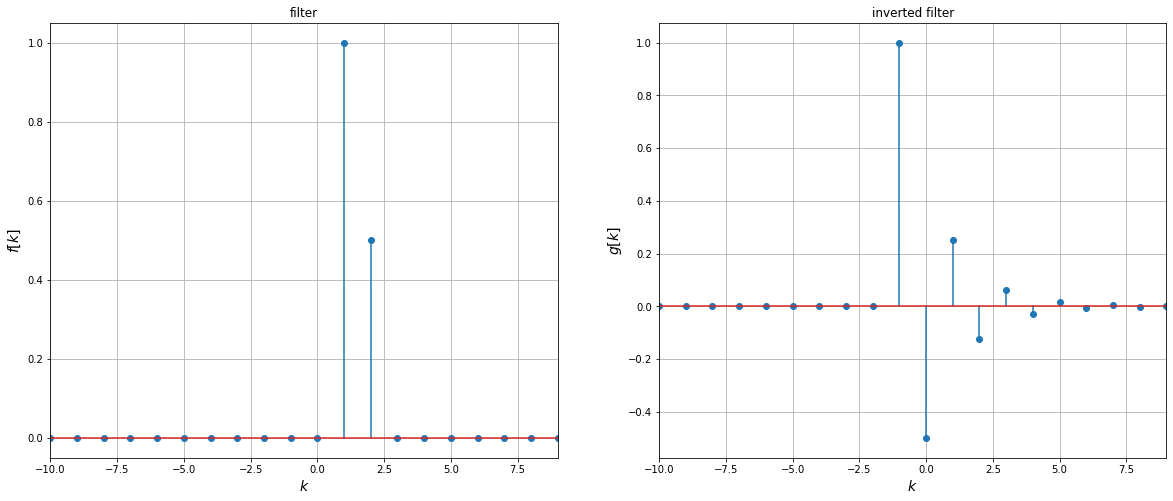

In [67]:
plot_time()

# Example 1.11 (as of 2020)

In [68]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#-------------------------------------------------------------------------------

def h(k):
  if k == 1:
    return 1
  elif k == 2:
    return 2
  return 0

def g_r(k):
  if k >= -1:
    return (-1/2)**(-k)
  return 0

def g_l(k):
  if k < 0:
    return -(-1/2)**(-k)
  return 0

def g_l_delay_truncated(k):
  if k < 0:
    return 0
  return g_l(k-4)

k_values = np.arange(-10,10)

def plot_time2():
  y_values = [h(k) for k in k_values]
  y2_values = [g_r(k) for k in k_values]
  y3_values = [g_l(k) for k in k_values]
  y4_values = [g_l_delay_truncated(k) for k in k_values]

  fig = plt.figure(figsize=(20, 14))

  ax1 = fig.add_subplot(2, 2, 1)
  ax1.grid()
  ax1.set_title('signal')
  ax1.set_xlabel('$k$', fontsize=14)
  ax1.set_ylabel('$f[k]$', fontsize=14)
  ax1.axis(xmin=k_values[0], xmax=k_values[-1])
  ax1.stem(k_values, y_values);

  ax2 = fig.add_subplot(2, 2, 2)
  ax2.grid()
  ax2.set_title('right sided inversion')
  ax2.set_xlabel('$k$', fontsize=14)
  ax2.set_ylabel('$g_r[k]$', fontsize=14)
  ax2.axis(xmin=k_values[0], xmax=k_values[-1])
  ax2.stem(k_values, y2_values);

  ax3 = fig.add_subplot(2, 2, 3)
  ax3.grid()
  ax3.set_title('left sided inversion')
  ax3.set_xlabel('$k$', fontsize=14)
  ax3.set_ylabel('$g_l[k]$', fontsize=14)
  ax3.axis(xmin=k_values[0], xmax=k_values[-1])
  ax3.stem(k_values, y3_values);

  ax3 = fig.add_subplot(2, 2, 4)
  ax3.grid()
  ax3.set_title('truncated and causal left sided inversion')
  ax3.set_xlabel('$k$', fontsize=14)
  ax3.set_ylabel('$truncated\ delayed\ g_l[k]$', fontsize=14)
  ax3.axis(xmin=k_values[0], xmax=k_values[-1])
  ax3.stem(k_values, y4_values);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning 

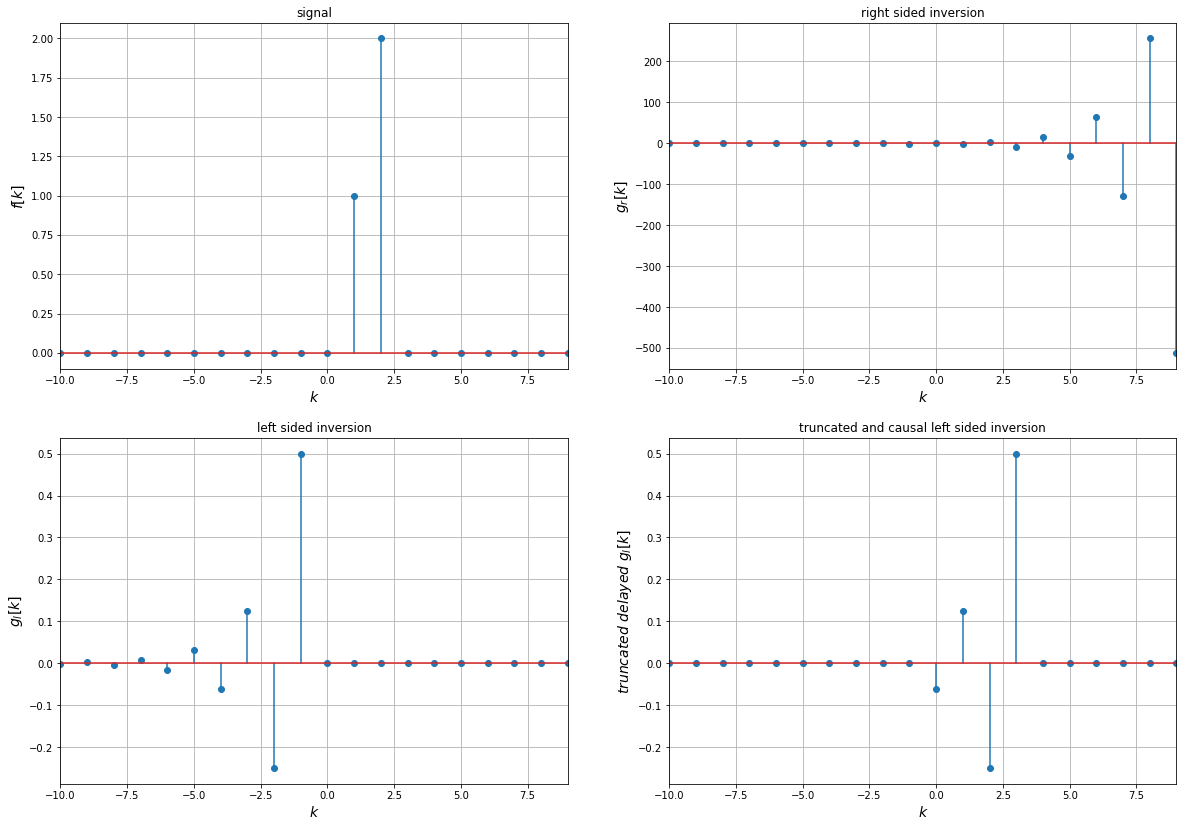

In [69]:
plot_time2()

# Right Sided Inversion Formula

In [70]:
pip install pydsm

In [71]:
!gdown https://drive.google.com/uc?id=1-nxgfNaJPeB88X_kE5T2xDqiGI5T2I1u

Downloading...
From: https://drive.google.com/uc?id=1-nxgfNaJPeB88X_kE5T2xDqiGI5T2I1u
To: /content/signals.py
100% 6.53k/6.53k [00:00<00:00, 24.3MB/s]


In [72]:
import signals
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt

Suppose $h[k]$ is a function describing an arbitrary right sided signal. We obtain the right sided inversion with the algorithm on page 14 (as of 2020). To avoid duplicate computation the technique of memoization is used here. The offset corresponds to $m$ in the lecture notes and must first be set before computing the right sided inversion filter.

In [125]:
#FILTER INVERSION ALGORITHM
#assumes h() is a well-defined function
offset = 0
mem_r = {}

def g_right_sided_set_init():
  global offset, mem_r
  offset = np.nonzero(list(map(h, signals.nG3)))[0][0] - 60 #with index 60, m = 0 since it is counted from left border and not center
  print("offset m set to", offset)
  mem_r = {}


def g_right_sided_at(idx):
  m = offset
  n = -offset
  k = idx - n

  #computes a(l) using h(idx)
  def a(l):
    return h(l+m)
  #computes b(l) using g_right_sided_at(idx)
  def b(l):
    return g_right_sided_at(l+n)

  if idx in mem_r:
    return mem_r[k]

  if k < 0:
    mem_r[k] = 0

  elif k == 0:
    mem_r[k] = 1/a(0)
  
  else: # k > 0
    sum = 0
    for i in range(0, k): #0, ..., k-1
      sum += a(k-i) * b(i)
    mem_r[k] = -sum/h(offset)

  return mem_r[k]

## Applying the inversion formula to a signal

You may select any signal to test the inversion formula. You will see that the inverse signal need not be stable.

In [126]:
signals.widget()

def update_parameters(logPlot):
  global logPlotG
  logPlotG = logPlot

widgets.interact(update_parameters,
  logPlot = widgets.Checkbox(
    value=False,
    description='logarithmic plot')
);

interactive(children=(Dropdown(description='signal type', options=('unit step', 'unit impulse', 'ramp', 'expon…

interactive(children=(Checkbox(value=False, description='logarithmic plot'), Output()), _dom_classes=('widget-…

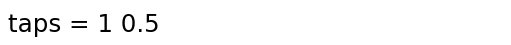

In [130]:
signals.display_signal_selection(continuous=False) #do not be confused by u[k], it is actually h[k]

Make sure each time you update the signal you run the graph plotting code below to read in the new signal.

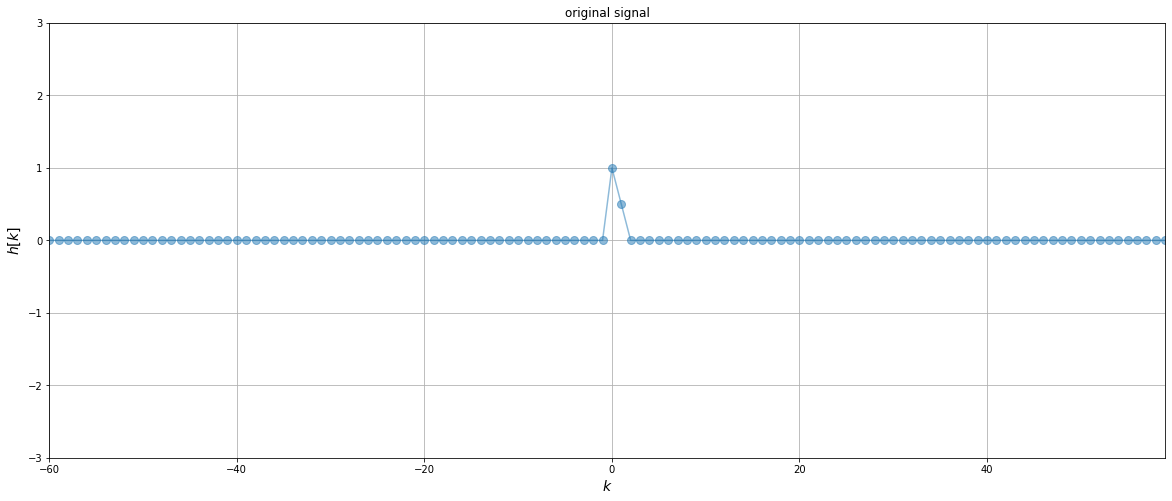

In [131]:
time_values = signals.nG3
h_values = signals.time_domain_signal_long()

fig = plt.figure(figsize=(20, 8))

ax1 = fig.add_subplot(1, 1, 1)
ax1.grid()
ax1.set_title('original signal')
ax1.set_xlabel('$k$', fontsize=14)
ax1.set_ylabel('$h[k]$', fontsize=14)
ax1.axis(xmin=time_values[0], xmax=time_values[-1])
if logPlotG == False:
  ax1.axis(ymin=-3, ymax=3)
  ax1.plot(time_values, h_values, alpha=0.5, marker='o', markersize=8);
else:
  ax1.axis(ymin=0.1, ymax=3)
  ax1.semilogy(time_values, h_values, alpha=0.5, marker='o', markersize=8);

Let us apply the right sided inversion to the filtered signal.

In [132]:
def h(k):#yields original signal indexed by (possibly negative) k
  if k in list(time_values):
    return h_values[list(time_values).index(k)]
  else:
    return 0

g_right_sided_set_init()
g_values = [g_right_sided_at(t) for t in time_values]

offset m set to 0


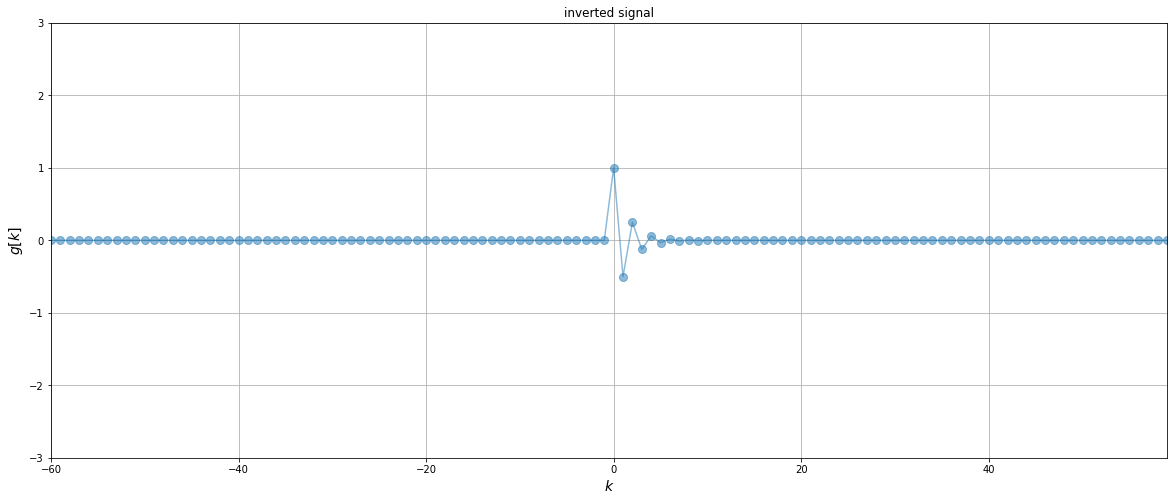

In [133]:
fig = plt.figure(figsize=(20, 8))

ax2 = fig.add_subplot(1, 1, 1)
ax2.grid()
ax2.set_title('inverted signal')
ax2.set_xlabel('$k$', fontsize=14)
ax2.set_ylabel('$g[k]$', fontsize=14)
ax2.axis(xmin=time_values[0], xmax=time_values[-1])
if logPlotG == False:
  ax2.axis(ymin=-3, ymax=3)
  ax2.plot(time_values, g_values, alpha=0.5, marker='o', markersize=8);
else:
  ax2.axis(ymin=0.1, ymax=3)
  ax2.semilogy(time_values, g_values, alpha=0.5, marker='o', markersize=8);